In [8]:
from keras.models import load_model
import glob
import cv2
import numpy as np
model = load_model('Kanaldeckel.h5')

In [34]:
X_test = [cv2.resize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_RGB2BGR), (100,100),interpolation = cv2.INTER_LINEAR) for file in glob.glob("Test_images/*")]
print(len(X_test))

8


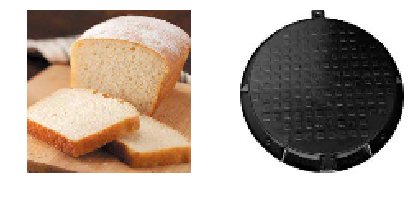

In [35]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(7, 3))
axes = axes.ravel()


axes[0].axis('off')
axes[0].imshow(X_test[1].squeeze(), cmap='gray')

axes[1].axis('off')
axes[1].imshow(X_test[2].squeeze(), cmap='gray')
plt.show()

In [36]:

# Normalizing and grayscaling of the images
def grayscale(x):
    return np.sum(x/3, axis=3, keepdims=True)
def norm(x):
    return (x - 128)/128

In [37]:
X_test = np.array(X_test)
X_test = np.copy(X_test)
X_test = norm(grayscale(X_test))

In [38]:
pred = model.predict(X_test)
for i in range(len(pred)):
    if pred[i] == 1:
        print("Kanaldeckel!")
    else:
        print("Kein Kanaldeckel!")

Kanaldeckel!
Kein Kanaldeckel!
Kanaldeckel!
Kein Kanaldeckel!
Kanaldeckel!
Kein Kanaldeckel!
Kanaldeckel!
Kanaldeckel!


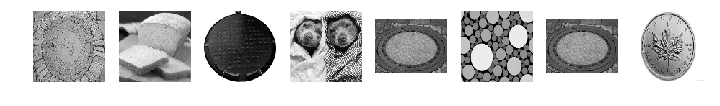

In [42]:
fig, axes = plt.subplots(1,8, figsize=(12, 10))
axes = axes.ravel()
axes[0].axis('off')
axes[0].imshow(X_test[0].squeeze(), cmap='gray')
axes[1].axis('off')
axes[1].imshow(X_test[1].squeeze(), cmap='gray')
axes[2].axis('off')
axes[2].imshow(X_test[2].squeeze(), cmap='gray')
axes[3].axis('off')
axes[3].imshow(X_test[3].squeeze(), cmap='gray')
axes[4].axis('off')
axes[4].imshow(X_test[4].squeeze(), cmap='gray')
axes[5].axis('off')
axes[5].imshow(X_test[5].squeeze(), cmap='gray')
axes[6].axis('off')
axes[6].imshow(X_test[6].squeeze(), cmap='gray')
axes[7].axis('off')
axes[7].imshow(X_test[7].squeeze(), cmap='gray')
plt.show()